In [ ]:
# Instalação do pacote
!pip install semopy

In [2]:
#baixando os dados do excel
!gdown 1UhjA0-4Fp-oi1pY-kli8sWe2DD3v4z2P

Downloading...
From: https://drive.google.com/uc?id=1UhjA0-4Fp-oi1pY-kli8sWe2DD3v4z2P
To: /content/exercicio path (1).xlsx
100% 27.6k/27.6k [00:00<00:00, 33.4MB/s]


In [3]:
import pandas as pd
from IPython import display

tabela = pd.read_excel('/content/exercicio path (1).xlsx')
tabela.head()

,id,Idade,genero,ALOC,Professor,Curso,Design,Tecnologia,Interacao,Satisfacao,Aprendizagem
0,1,33,Masculino,Interno,6.6,7.2,3.6,6.6,6.3,7.4,5.3
1,2,24,Feminino,Interno,9.5,9.4,9.3,9.9,9.4,9.9,9.6
2,3,30,Masculino,Interno,6.9,8.8,8.3,7.7,6.7,9.3,8.3
3,4,46,Feminino,Interno,6.5,4.4,5.9,6.7,6.1,6.8,4.7
4,5,28,Feminino,Interno,5.8,7.1,7.6,4.9,4.2,8.6,5.1


In [4]:
colunas = ['Professor', 'Curso', 'Design', 'Tecnologia', 'Interacao', 'Satisfacao', 'Aprendizagem']

tabela[ colunas ].head() # mostra as 5 primeiras linhas

,Professor,Curso,Design,Tecnologia,Interacao,Satisfacao,Aprendizagem
0,6.6,7.2,3.6,6.6,6.3,7.4,5.3
1,9.5,9.4,9.3,9.9,9.4,9.9,9.6
2,6.9,8.8,8.3,7.7,6.7,9.3,8.3
3,6.5,4.4,5.9,6.7,6.1,6.8,4.7
4,5.8,7.1,7.6,4.9,4.2,8.6,5.1


In [5]:
tabela[ colunas ].corr() # correlação entre todas as variáveis

,Professor,Curso,Design,Tecnologia,Interacao,Satisfacao,Aprendizagem
Professor,1.000000,0.698520,0.666092,0.574275,0.731593,0.689848,0.624066
Curso,0.698520,1.000000,0.787956,0.484048,0.600883,0.859512,0.766186
Design,0.666092,0.787956,1.000000,0.640373,0.613569,0.772872,0.715759
Tecnologia,0.574275,0.484048,0.640373,1.000000,0.607153,0.560064,0.480205
Interacao,0.731593,0.600883,0.613569,0.607153,1.000000,0.709523,0.754506
Satisfacao,0.689848,0.859512,0.772872,0.560064,0.709523,1.000000,0.814815
Aprendizagem,0.624066,0.766186,0.715759,0.480205,0.754506,0.814815,1.000000


# Modelo 1

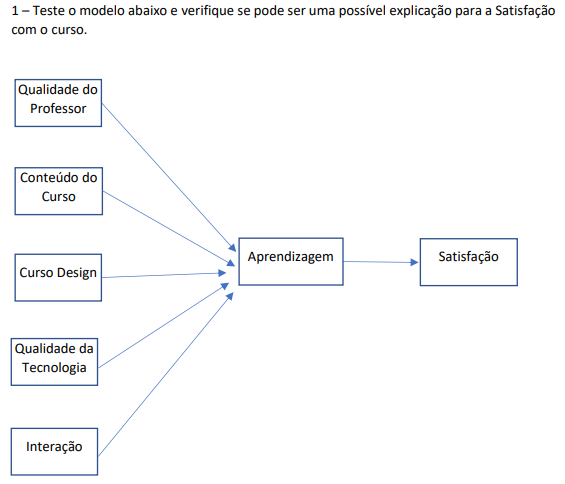

In [6]:
import semopy

# define full measurement and structural model
modelo_1 = """
Aprendizagem ~ Professor
Aprendizagem ~ Curso
Aprendizagem ~ Design
Aprendizagem ~ Tecnologia
Aprendizagem ~ Interacao

Satisfacao ~ Aprendizagem
"""

modelo_completo_1 = semopy.Model(modelo_1)
resultado_modelo_1 = modelo_completo_1.fit(tabela)
print(resultado_modelo_1)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 0.629
Number of iterations: 16
Params: -0.184 0.463 0.229 -0.124 0.639 0.861 2.334 3.438


In [7]:
ins = modelo_completo_1.inspect()
print(ins)

           lval  op          rval  Estimate  Std. Err    z-value   p-value
0  Aprendizagem   ~     Professor -0.183824  0.057286  -3.208875  0.001333
1  Aprendizagem   ~         Curso  0.463037  0.054928   8.429935  0.000000
2  Aprendizagem   ~        Design  0.229493  0.056979   4.027674  0.000056
3  Aprendizagem   ~    Tecnologia -0.124445  0.048006  -2.592269  0.009535
4  Aprendizagem   ~     Interacao  0.639233  0.053338  11.984494  0.000000
5    Satisfacao   ~  Aprendizagem  0.861298  0.034812  24.741082  0.000000
6  Aprendizagem  ~~  Aprendizagem  2.333686  0.187446  12.449900  0.000000
7    Satisfacao  ~~    Satisfacao  3.437953  0.276143  12.449900  0.000000


In [8]:
semopy.calc_stats(modelo_completo_1)

,DoF,DoF Baseline,chi2,chi2 p-value,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
Value,20,26,194.99397,0.0,1961.531767,0.909589,0.900591,0.870768,0.900591,0.882465,0.168274,14.741974,44.634553,0.629013


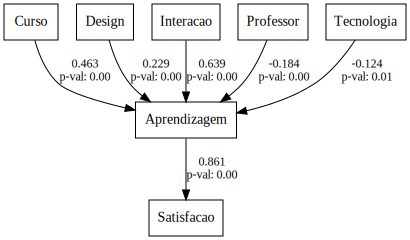

In [9]:
g = semopy.semplot(modelo_completo_1, "model1.png")
display.display(g)

# Modelo 2


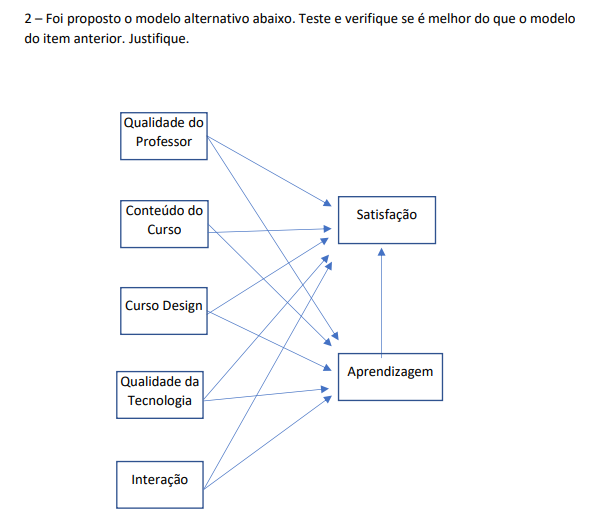

In [10]:
import semopy

# define full measurement and structural model
modelo_2 = """
Aprendizagem ~ Professor
Satisfacao ~ Professor
Aprendizagem ~ Curso
Satisfacao ~ Curso
Aprendizagem ~ Design
Satisfacao ~ Design
Aprendizagem ~ Tecnologia
Satisfacao ~ Tecnologia
Aprendizagem ~ Interacao
Satisfacao ~ Interacao
Satisfacao ~ Aprendizagem
"""

modelo_completo_2 = semopy.Model(modelo_2)
resultado_modelo_2 = modelo_completo_2.fit(tabela)

In [11]:
print(resultado_modelo_2)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 0.000
Number of iterations: 19
Params: -0.184 0.463 0.230 -0.125 0.640 -0.005 0.563 0.095 0.085 0.178 0.250 2.332 1.831


In [12]:
ins = modelo_completo_2.inspect()
print(ins)

            lval  op          rval  Estimate  Std. Err    z-value  \
0   Aprendizagem   ~     Professor -0.184160  0.057269  -3.215680   
1   Aprendizagem   ~         Curso  0.463044  0.054912   8.432517   
2   Aprendizagem   ~        Design  0.229556  0.056963   4.029953   
3   Aprendizagem   ~    Tecnologia -0.124534  0.047992  -2.594875   
4   Aprendizagem   ~     Interacao  0.639516  0.053323  11.993287   
5     Satisfacao   ~     Professor -0.004744  0.051589  -0.091964   
6     Satisfacao   ~         Curso  0.562522  0.053953  10.426205   
7     Satisfacao   ~        Design  0.095019  0.051782   1.834963   
8     Satisfacao   ~    Tecnologia  0.084691  0.042988   1.970122   
9     Satisfacao   ~     Interacao  0.178408  0.057173   3.120514   
10    Satisfacao   ~  Aprendizagem  0.249976  0.050330   4.966760   
11  Aprendizagem  ~~  Aprendizagem  2.332325  0.187337  12.449900   
12    Satisfacao  ~~    Satisfacao  1.831471  0.147107  12.449900   

         p-value  
0   1.301358e-

In [13]:
semopy.calc_stats(modelo_completo_2)

,DoF,DoF Baseline,chi2,chi2 p-value,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
Value,15,26,0.000098,1.0,1961.531767,1.00775,1.0,1.0,1.0,1.013433,0,25.999999,74.575439,3.154077e-07


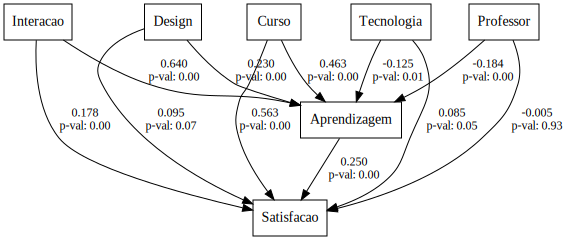

In [14]:
g = semopy.semplot(modelo_completo_2, "model2.png")
display.display(g)

# Escolha?

